In [2]:
import numpy as np
import pandas as pd

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Training_Adoption.csv')

In [70]:
df

,S No,Completion Rate,Date of Registration,Date of Analysis,No. of Days,Progress Rate (% per day),Name,Age,Department,Grade,Role,Gender,Training Name,Group,Delivery Methods,Duration (in hours)
0,1,73,09-04-2019,30-06-2019,82,0.89,Shawna,45.66,Sales,4,DGM,F,Budgeting Basics,Finance,Self-Paced,3
1,2,71,09-04-2019,30-06-2019,82,0.87,Nathaniel,23.76,FP&A,1,Associate,M,Budgeting Basics,Finance,Self-Paced,3
2,3,78,09-04-2019,30-06-2019,82,0.95,Elisabeth,22.68,Accounting,1,Associate,F,Budgeting Basics,Finance,Self-Paced,3
3,4,30,19-04-2019,30-06-2019,72,0.42,Briana,41.70,Marketing,3,Mgr,F,Budgeting Basics,Finance,Self-Paced,3
4,5,53,19-04-2019,30-06-2019,72,0.74,Estella,22.39,Accounting,1,Associate,F,Budgeting Basics,Finance,Self-Paced,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,42,15-04-2019,30-06-2019,76,0.55,Morton,56.97,IT Ops,4,Sr Mgr,M,Emotional Intelligence for Front Line Managers,Workplace,Virtual Classroom,3
296,297,26,08-04-2019,30-06-2019,83,0.31,Andrew,30.42,IT Ops,2,TL,M,Emotional Intelligence for Front Line Managers,Workplace,Virtual Classroom,3
297,298,28,08-04-2019,30-06-2019,83,0.34,Ava,45.21,IT Ops,4,Sr Mgr,F,Emotional Intelligence for Front Line Managers,Workplace,Virtual Classroom,3
298,299,21,08-04-2019,30-06-2019,83,0.25,Anastasia,24.61,IT Ops,1,Associate,F,Emotional Intelligence for Front Line Managers,Workplace,Virtual Classroom,3


In [32]:
df.describe()

,S No,Completion Rate,Age,Grade,Duration (in hours)
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,48.633333,40.054433,2.933333,7.533333
std,86.746758,27.202675,11.242573,1.143056,6.687648
min,1.000000,0.000000,21.040000,1.000000,1.000000
25%,75.750000,29.000000,30.810000,2.000000,3.000000
50%,150.500000,46.000000,40.210000,3.000000,5.000000
75%,225.250000,71.250000,49.680000,4.000000,13.000000
max,300.000000,100.000000,59.780000,5.000000,26.000000


In [34]:
df.isnull().sum()

S No                         0
Completion Rate              0
Date of Registration         0
Date of Analysis             0
No. of Days                  0
Progress Rate (% per day)    0
Name                         0
Age                          0
Department                   0
Grade                        0
Role                         0
Gender                       0
Training Name                0
Group                        0
Delivery Methods             0
Duration (in hours)          0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S No                       300 non-null    int64  
 1   Completion Rate            300 non-null    int64  
 2   Date of Registration       300 non-null    object 
 3   Date of Analysis           300 non-null    object 
 4   No. of Days                300 non-null    object 
 5   Progress Rate (% per day)  300 non-null    object 
 6   Name                       300 non-null    object 
 7   Age                        300 non-null    float64
 8   Department                 300 non-null    object 
 9   Grade                      300 non-null    int64  
 10  Role                       300 non-null    object 
 11  Gender                     300 non-null    object 
 12  Training Name              300 non-null    object 
 13  Group                      300 non-null    object 

In [64]:
df['Date of Registration'].value_counts()
#here we find Nil VALUES

Date of Registration
05-04-2019    29
04-01-2019    28
15-04-2019    25
06-01-2019    17
02-02-2019    15
07-01-2019    14
05-05-2019    13
30-03-2019    12
21-05-2019    12
07-03-2019    11
Nil           10
22-04-2019    10
08-04-2019     9
21-03-2019     9
14-06-2019     9
19-04-2019     7
09-04-2019     7
25-05-2019     7
07-06-2019     6
17-02-2019     5
21-02-2019     5
12-04-2019     4
12-03-2019     4
18-03-2019     4
01-03-2019     4
03-03-2019     4
06-02-2019     3
25-04-2019     3
29-04-2019     3
04-04-2019     3
04-02-2019     2
08-05-2019     2
07-02-2019     2
26-05-2019     1
29-05-2019     1
Name: count, dtype: int64

In [8]:
df['Date of Registration'].isna().sum()

0

In [9]:
df['Date of Registration']= df['Date of Registration'].replace("Nil",np.nan)

In [10]:
df['Date of Registration'].fillna(df['Date of Registration'].median,inplace=True)

In [11]:
df['Date of Registration']

0      09-04-2019
1      09-04-2019
2      09-04-2019
3      19-04-2019
4      19-04-2019
          ...    
295    15-04-2019
296    08-04-2019
297    08-04-2019
298    08-04-2019
299    08-04-2019
Name: Date of Registration, Length: 300, dtype: object

In [12]:
# Convert 'Date of Registration' to datetime objects with the correct format
df['Date of Registration'] = pd.to_datetime(df['Date of Registration'], format='%d-%m-%Y', errors='coerce')

# Check the data type again
print(df['Date of Registration'].dtype)

# Format datetime objects to remove time component and keep day-month-year format
df['Date of Registration'] = df['Date of Registration'].dt.strftime('%d-%m-%Y')

datetime64[ns]


In [13]:
df['Date of Registration']

0      09-04-2019
1      09-04-2019
2      09-04-2019
3      19-04-2019
4      19-04-2019
          ...    
295    15-04-2019
296    08-04-2019
297    08-04-2019
298    08-04-2019
299    08-04-2019
Name: Date of Registration, Length: 300, dtype: object

In [14]:
df['No. of Days'].value_counts()

No. of Days
86         29
177        28
76         25
175        17
148        15
174        14
56         13
92         12
40         12
115        11
#VALUE!    10
69         10
83          9
101         9
16          9
72          7
82          7
36          7
23          6
133         5
129         5
79          4
110         4
104         4
121         4
119         4
144         3
66          3
62          3
87          3
146         2
53          2
143         2
35          1
32          1
Name: count, dtype: int64

In [15]:
df['No. of Days'] = df['No. of Days'].replace('#VALUE!',np.nan)

In [16]:
df['No. of Days'].isnull().sum()

10

In [17]:
df['No. of Days'].fillna(df['No. of Days'].median,inplace=True)

In [18]:
df['No. of Days'].isnull().sum()

0

In [19]:
# lets convert No of days to numberic 

In [20]:
# Convert 'Date of Registration' to datetime objects with the correct format
df['No. of Days'] = pd.to_numeric(df['No. of Days'], errors='coerce')

# Check the data type again
print(df['No. of Days'].dtype)

float64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S No                       300 non-null    int64  
 1   Completion Rate            300 non-null    int64  
 2   Date of Registration       290 non-null    object 
 3   Date of Analysis           300 non-null    object 
 4   No. of Days                290 non-null    float64
 5   Progress Rate (% per day)  300 non-null    object 
 6   Name                       300 non-null    object 
 7   Age                        300 non-null    float64
 8   Department                 300 non-null    object 
 9   Grade                      300 non-null    int64  
 10  Role                       300 non-null    object 
 11  Gender                     300 non-null    object 
 12  Training Name              300 non-null    object 
 13  Group                      300 non-null    object 

In [22]:
df['Progress Rate (% per day)'] = pd.to_numeric(df['Progress Rate (% per day)'],errors="coerce")

In [23]:
df['Progress Rate (% per day)'].fillna(df['Progress Rate (% per day)'].median,inplace=True)

In [24]:
df['Progress Rate (% per day)'].dropna(inplace=True)

In [25]:
# Drop rows with missing values (NaN)
df.dropna(inplace=True)

In [26]:
df['Progress Rate (% per day)'].isnull().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S No                       290 non-null    int64  
 1   Completion Rate            290 non-null    int64  
 2   Date of Registration       290 non-null    object 
 3   Date of Analysis           290 non-null    object 
 4   No. of Days                290 non-null    float64
 5   Progress Rate (% per day)  290 non-null    object 
 6   Name                       290 non-null    object 
 7   Age                        290 non-null    float64
 8   Department                 290 non-null    object 
 9   Grade                      290 non-null    int64  
 10  Role                       290 non-null    object 
 11  Gender                     290 non-null    object 
 12  Training Name              290 non-null    object 
 13  Group                      290 non-null    object 
 14 

In [153]:
#Data cleaning and validation is completed.
#Next stage is visualisation part

In [154]:
#EDA

In [29]:
df.drop('S No',axis=1,inplace = True)

In [31]:
df.columns

Index(['Completion Rate', 'Date of Registration', 'Date of Analysis',
       'No. of Days', 'Progress Rate (% per day)', 'Name', 'Age', 'Department',
       'Grade', 'Role', 'Gender', 'Training Name', 'Group', 'Delivery Methods',
       'Duration (in hours)'],
      dtype='object')

In [128]:
# Scatter plot for 'No. of Days' vs 'Completion Rate' with hover
plt.figure(figsize=(13, 3))
fig = px.scatter(df, x='No. of Days', y='Completion Rate', hover_data={'Completion Rate': True},color='Gender')
fig.update_layout(title='Completion Rate vs No. of Days', xaxis_title='No. of Days', yaxis_title='Completion Rate')
fig.show()

<Figure size 1300x300 with 0 Axes>

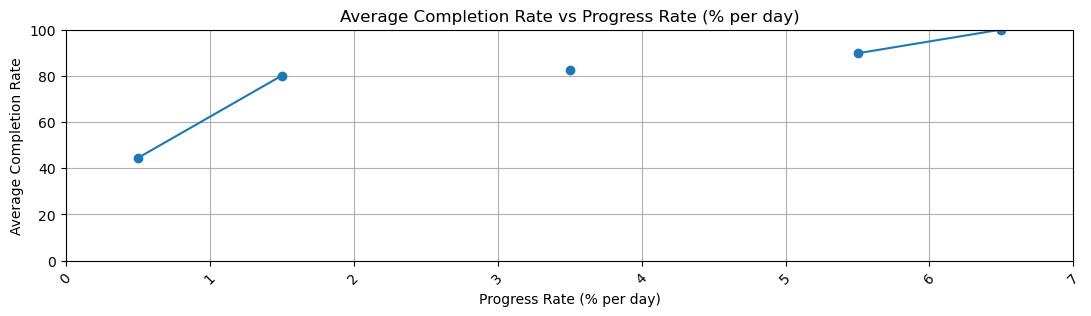

In [127]:
# Define the bins for 'Progress Rate (% per day)'
bins = [0, 1, 2, 3, 4, 5, 6, 7]

# Grouping by bins and calculating the average completion rate for each group
df['Progress Rate Bin'] = pd.cut(df['Progress Rate (% per day)'], bins, right=False)
grouped_df = df.groupby('Progress Rate Bin')['Completion Rate'].mean().reset_index()

# Extract the midpoints of the intervals
grouped_df['Progress Rate Midpoint'] = grouped_df['Progress Rate Bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(13, 3))
plt.plot(grouped_df['Progress Rate Midpoint'], grouped_df['Completion Rate'], marker='o', linestyle='-')
plt.xlabel('Progress Rate (% per day)')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate vs Progress Rate (% per day)')
plt.grid(True)
plt.xlim(0, 7)  # Set x-axis limits from 0 to 7
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [77]:
df[(df['Progress Rate (% per day)'] < 5) & (df['Progress Rate (% per day)'] > 4)]

,Completion Rate,Date of Registration,Date of Analysis,No. of Days,Progress Rate (% per day),Name,Age,Department,Grade,Role,Gender,Training Name,Group,Delivery Methods,Duration (in hours),Progress Rate Bin


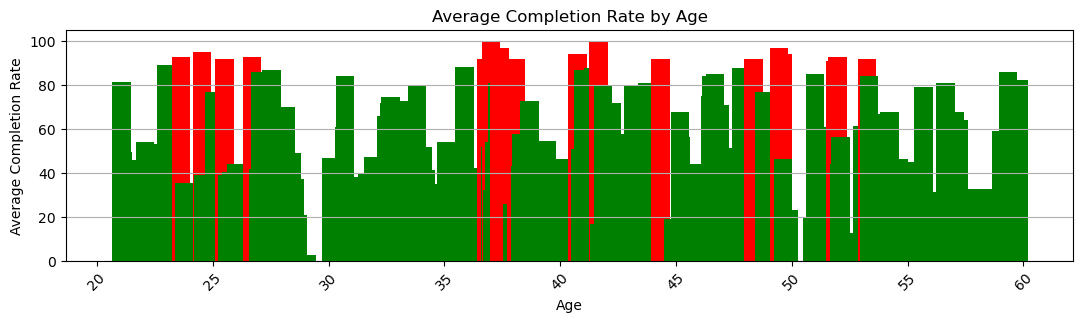

In [126]:
# Calculate average completion rate for each age
avg_completion_rate = df.groupby('Age')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Conditionally set the color for each bar
colors = ['red' if 90 <= rate <= 100 else 'green' for rate in avg_completion_rate.values]

plt.bar(avg_completion_rate.index, avg_completion_rate.values, color=colors)
plt.xlabel('Age')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Age')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

(array([33., 30., 28., 24., 31., 38., 25., 24., 28., 29.]),
 array([21.04 , 24.914, 28.788, 32.662, 36.536, 40.41 , 44.284, 48.158,
        52.032, 55.906, 59.78 ]),
 <BarContainer object of 10 artists>)

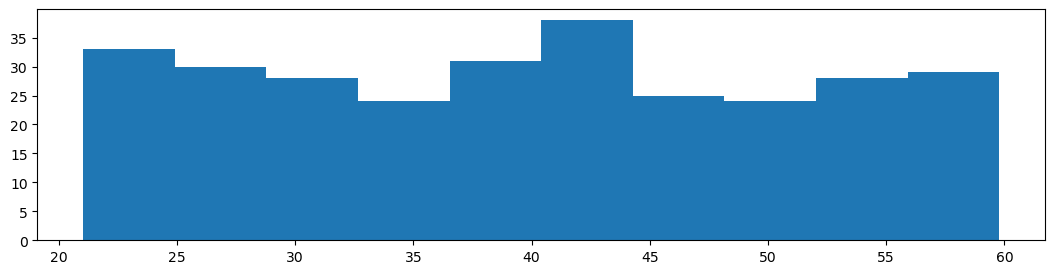

In [125]:
plt.figure(figsize=(13, 3))
plt.hist(x='Age',data=df)

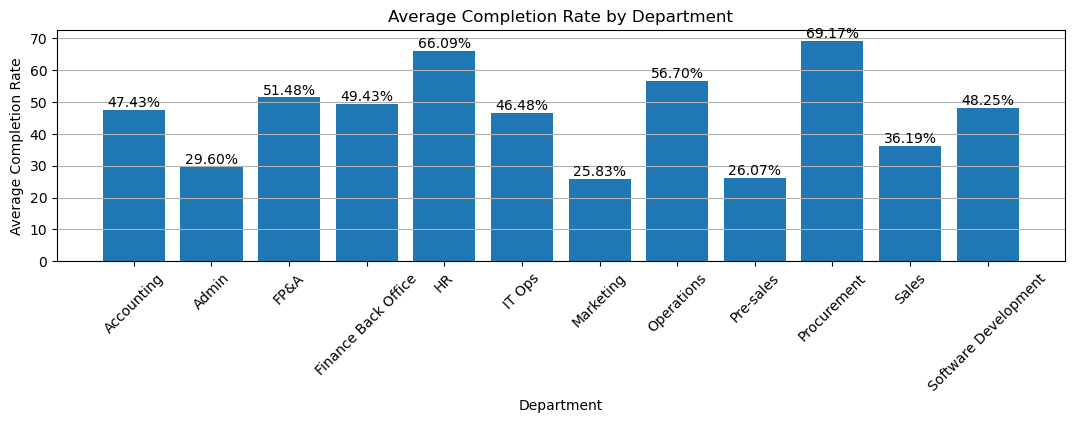

In [124]:
# Calculate average completion rate for each department
avg_completion_rate = df.groupby('Department')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values)

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Department')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Department')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

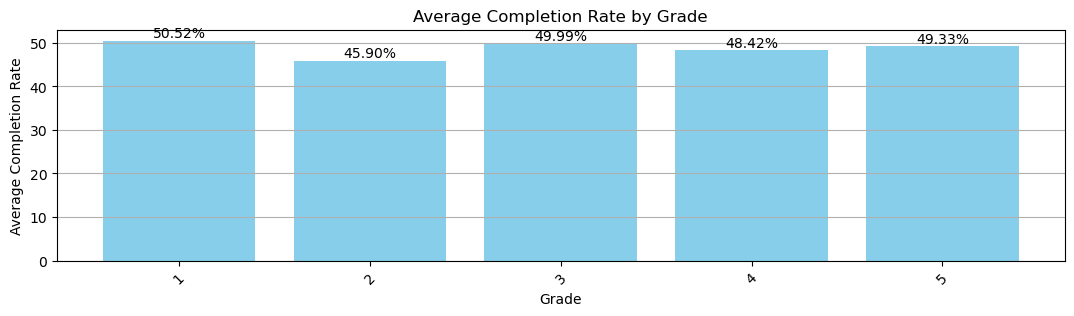

In [123]:
# Plotting
plt.figure(figsize=(13, 3))

avg_completion_rate = df.groupby('Grade')['Completion Rate'].mean()

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Grade')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Grade')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

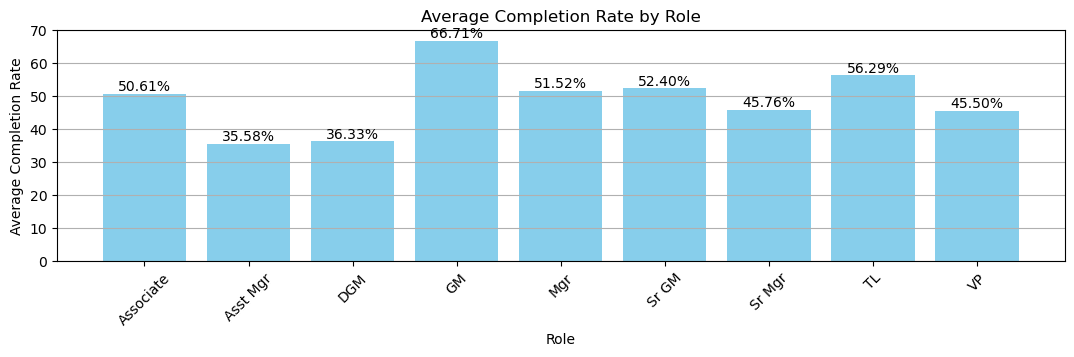

In [122]:
# Calculate average completion rate for each role
avg_completion_rate = df.groupby('Role')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Role')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Role')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

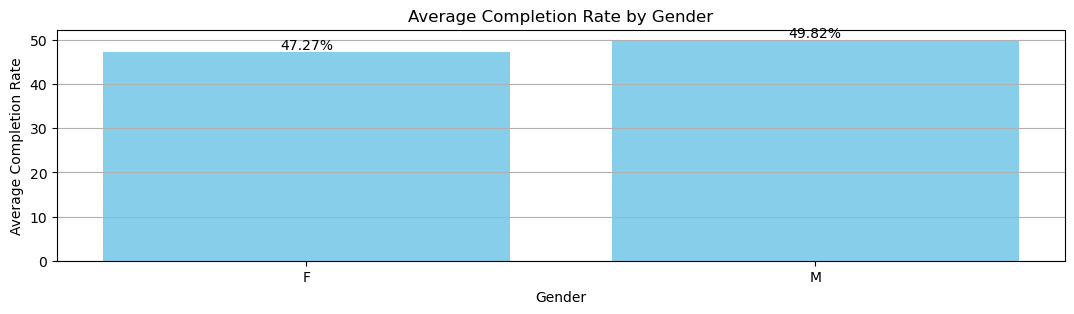

In [121]:
# Calculate average completion rate for each gender
avg_completion_rate = df.groupby('Gender')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Gender')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

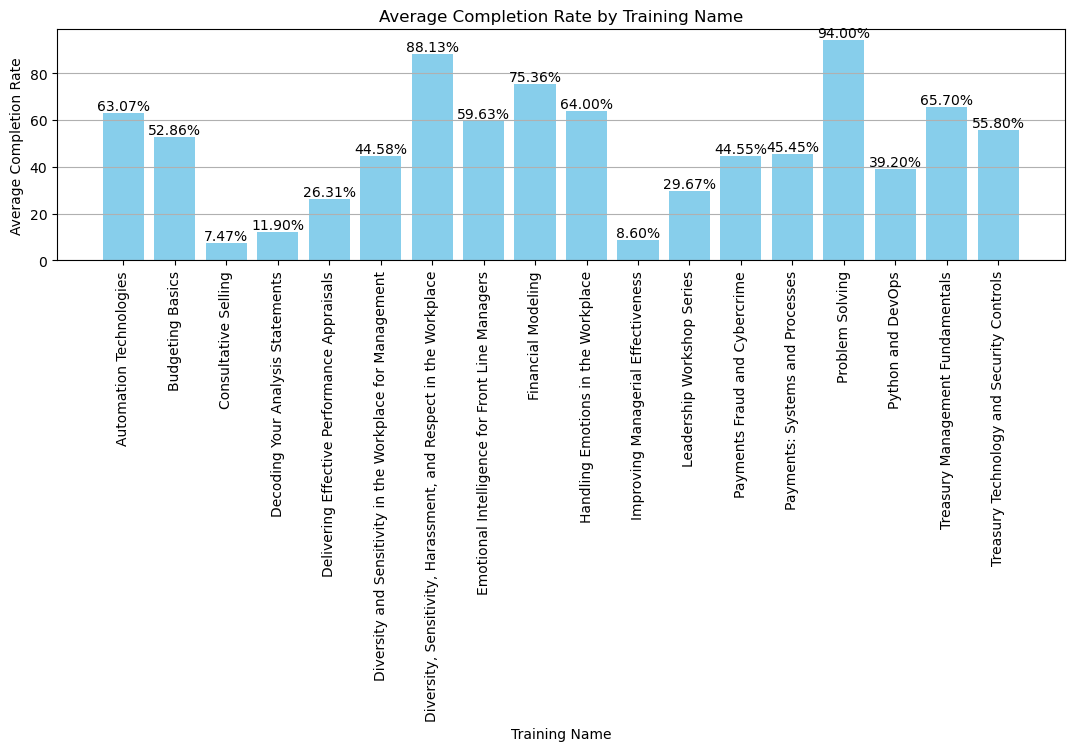

In [120]:
# Calculate average completion rate for each training name
avg_completion_rate = df.groupby('Training Name')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Training Name')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Training Name')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

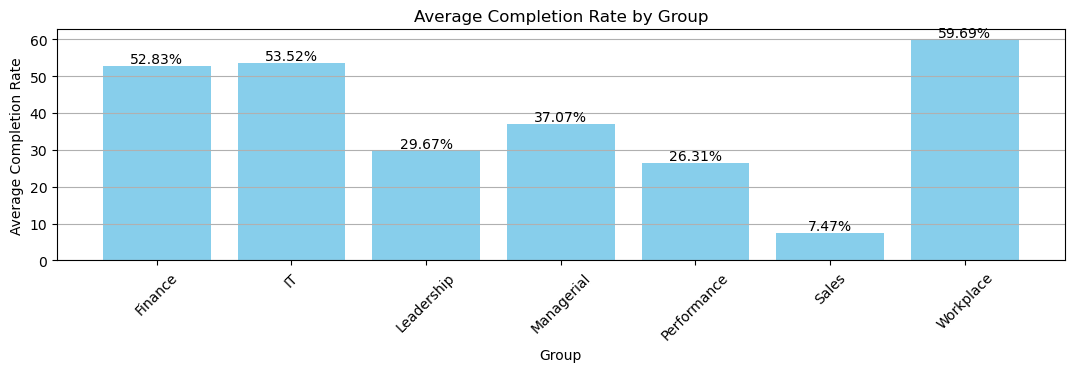

In [119]:
# Calculate average completion rate for each group
avg_completion_rate = df.groupby('Group')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(13, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Group')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Group')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

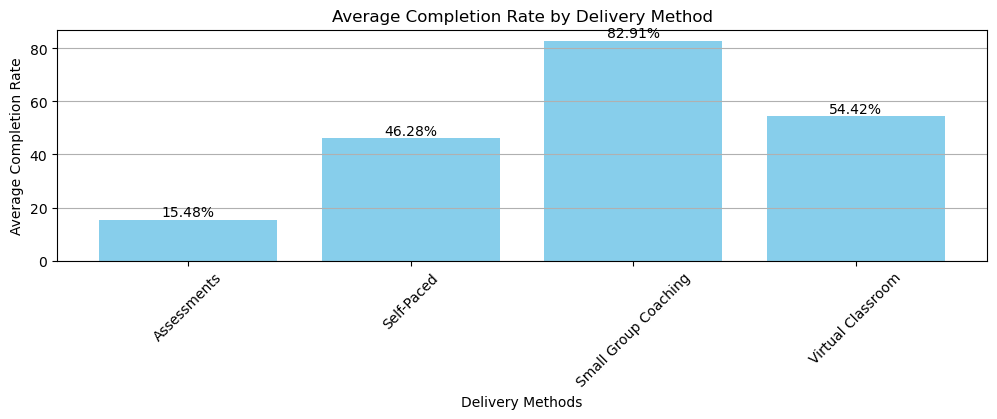

In [118]:
# Calculate average completion rate for each delivery method
avg_completion_rate = df.groupby('Delivery Methods')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(12, 3))

# Create bar plot
bars = plt.bar(avg_completion_rate.index, avg_completion_rate.values, color='skyblue')

# Annotate each bar with the average completion rate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Delivery Methods')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Delivery Method')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

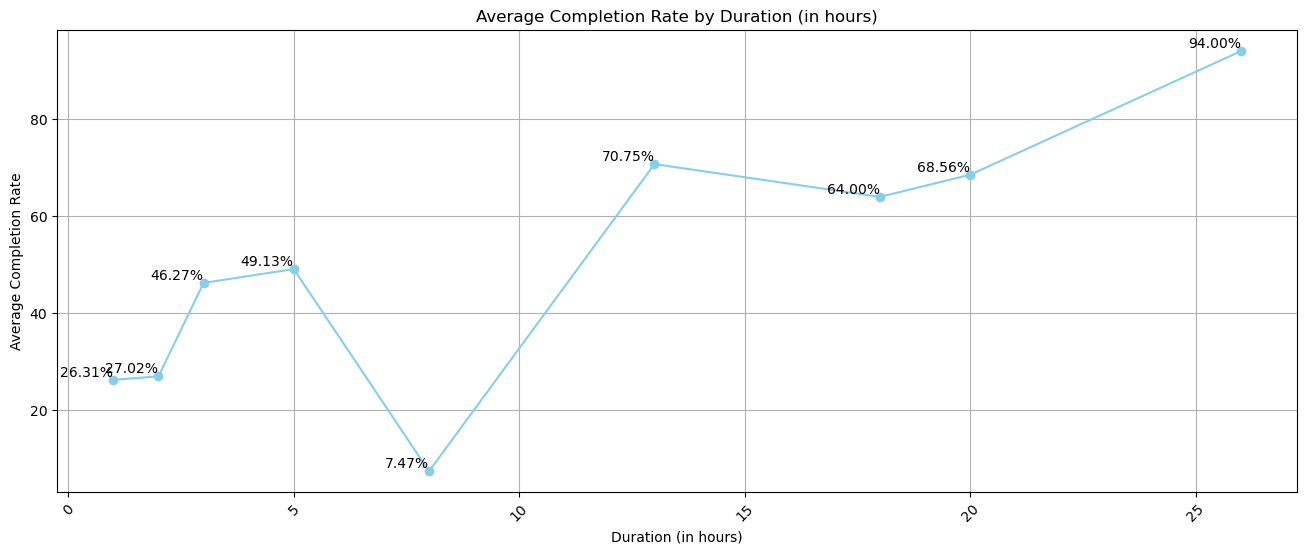

In [117]:
# Calculate average completion rate for each duration (in hours)
avg_completion_rate = df.groupby('Duration (in hours)')['Completion Rate'].mean()

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(avg_completion_rate.index, avg_completion_rate.values, marker='o', color='skyblue', linestyle='-')

# Annotate each point with the average completion rate
for x, y in zip(avg_completion_rate.index, avg_completion_rate.values):
    plt.text(x, y, f'{y:.2f}%', ha='right', va='bottom')

plt.xlabel('Duration (in hours)')
plt.ylabel('Average Completion Rate')
plt.title('Average Completion Rate by Duration (in hours)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [89]:
df.columns

Index(['Completion Rate', 'Date of Registration', 'Date of Analysis',
       'No. of Days', 'Progress Rate (% per day)', 'Name', 'Age', 'Department',
       'Grade', 'Role', 'Gender', 'Training Name', 'Group', 'Delivery Methods',
       'Duration (in hours)', 'Progress Rate Bin', 'Age Group'],
      dtype='object')

In [107]:
df['Grade']

0      4
1      1
2      1
3      3
4      1
      ..
295    4
296    2
297    4
298    1
299    3
Name: Grade, Length: 290, dtype: int64

In [129]:
#Questons i had after analysing data

In [ ]:
# 1. In department which delivery method had average completion rate
# 2. in which delivery method over gender had average completion rate
# 3. What Training Name had 'Small Group Coaching'
# 4. what departments don't have small group coaching delivery method.
# 5. Departments over delivery methods, average completion rate. (duplicate question)
# 6. Delivery method and duration
# 7. group over delivery method
# 8. To find the training names and delivery methods with an average completion rate less than 30%
# 9 . group Role wise and tabulate average completion rate in delivery method, training name.

In [141]:
# Calculate average completion rate for each department and delivery method
avg_completion_rate = df.groupby(['Department', 'Delivery Methods'])['Completion Rate'].mean().unstack()

# Create traces for each delivery method
data = []
for method in avg_completion_rate.columns:
    trace = go.Bar(
        x=avg_completion_rate.index,
        y=avg_completion_rate[method],
        name=method,
        text=[f'{rate:.2f}%' for rate in avg_completion_rate[method]],
        textposition='inside',
        hoverinfo='x+text',
    )
    data.append(trace)

# Set layout
layout = go.Layout(
    title='Average Completion Rate by Department and Delivery Method',
    xaxis=dict(title='Department'),
    yaxis=dict(title='Average Completion Rate'),
    barmode='group',
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

In [142]:
# Calculate average completion rate for each gender and delivery method
avg_completion_rate_gender = df.groupby(['Gender', 'Delivery Methods'])['Completion Rate'].mean().unstack()

# Create traces for each delivery method
data = []
for method in avg_completion_rate_gender.columns:
    trace = go.Bar(
        x=avg_completion_rate_gender.index,
        y=avg_completion_rate_gender[method],
        name=method,
        text=[f'{rate:.2f}%' for rate in avg_completion_rate_gender[method]],
        textposition='inside',
        hoverinfo='x+text',
    )
    data.append(trace)

# Set layout
layout = go.Layout(
    title='Average Completion Rate by Gender and Delivery Method',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Average Completion Rate'),
    barmode='group',
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

In [143]:
# Filter the data for the delivery method 'Small Group Coaching'
small_group_data = df[df['Delivery Methods'] == 'Small Group Coaching']

# Calculate average completion rate for each training name
avg_completion_rate = small_group_data.groupby('Training Name')['Completion Rate'].mean()

# Create bar trace
trace = go.Bar(
    x=avg_completion_rate.index,
    y=avg_completion_rate.values,
    text=[f'{rate:.2f}%' for rate in avg_completion_rate.values],
    textposition='auto',
    hoverinfo='x+text',
)

# Set layout
layout = go.Layout(
    title='Average Completion Rate for "Small Group Coaching" by Training Name',
    xaxis=dict(title='Training Name'),
    yaxis=dict(title='Average Completion Rate'),
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

In [145]:
# Filter the data for the delivery method 'Small Group Coaching'
small_group_data = df[df['Delivery Methods'] == 'Virtual Classroom']

# Calculate average completion rate for each training name
avg_completion_rate = small_group_data.groupby('Training Name')['Completion Rate'].mean()

# Create bar trace
trace = go.Bar(
    x=avg_completion_rate.index,
    y=avg_completion_rate.values,
    text=[f'{rate:.2f}%' for rate in avg_completion_rate.values],
    textposition='auto',
    hoverinfo='x+text',
)

# Set layout
layout = go.Layout(
    title='Average Completion Rate for "Virtual Classroom" by Training Name',
    xaxis=dict(title='Training Name'),
    yaxis=dict(title='Average Completion Rate'),
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

In [147]:
# Group data by Delivery Methods and calculate average duration and completion rate
avg_duration = df.groupby('Delivery Methods')['Duration (in hours)'].mean()
avg_completion_rate = df.groupby('Delivery Methods')['Completion Rate'].mean()

# Create traces for duration and completion rate
trace_duration = go.Bar(
    x=avg_duration.index,
    y=avg_duration.values,
    name='Duration (hours)',
    text=[f'{duration:.2f} hours' for duration in avg_duration.values],
    textposition='auto',
    hoverinfo='text',
)
trace_completion_rate = go.Bar(
    x=avg_completion_rate.index,
    y=avg_completion_rate.values,
    name='Completion Rate (%)',
    text=[f'{rate:.2f}%' for rate in avg_completion_rate.values],
    textposition='auto',
    hoverinfo='text',
)

# Set layout
layout = go.Layout(
    title='Average Duration and Completion Rate by Delivery Method',
    xaxis=dict(title='Delivery Method'),
    yaxis=dict(title='Value'),
    barmode='group',
)

# Create figure
fig = go.Figure(data=[trace_duration, trace_completion_rate], layout=layout)

# Show plot
fig.show()

In [148]:
# Filter the dataframe for average completion rate less than 30%
low_completion_rate_data = df[df['Completion Rate'] < 30]

# Extract the training names and delivery methods from the filtered dataframe
training_names = low_completion_rate_data['Training Name'].unique()
delivery_methods = low_completion_rate_data['Delivery Methods'].unique()

print("Training Names with Average Completion Rate < 30%:")
print(training_names)

print("\nDelivery Methods with Average Completion Rate < 30%:")
print(delivery_methods)

Training Names with Average Completion Rate < 30%:
['Decoding Your Analysis Statements' 'Treasury Management Fundamentals'
 'Treasury Technology and Security Controls' 'Consultative Selling'
 'Delivering Effective Performance Appraisals'
 'Diversity and Sensitivity in the Workplace for Management'
 'Improving Managerial Effectiveness' 'Leadership Workshop Series'
 'Python and DevOps' 'Emotional Intelligence for Front Line Managers']

Delivery Methods with Average Completion Rate < 30%:
['Assessments' 'Self-Paced' 'Virtual Classroom']


In [157]:
# Filter the dataframe for completion rates less than 50%
low_completion_rate_data = df[df['Completion Rate'] < 50]

# Set Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Group the filtered data by Role, Delivery Methods, and Training Name and calculate the average completion rate
avg_completion_rate_role = low_completion_rate_data.groupby(['Role', 'Delivery Methods', 'Training Name'])['Completion Rate'].mean()

# Display the tabulated average completion rate
print(avg_completion_rate_role)

Role       Delivery Methods      Training Name                                            
Associate  Assessments           Decoding Your Analysis Statements                            18.500000
                                 Improving Managerial Effectiveness                            9.200000
           Self-Paced            Automation Technologies                                      41.500000
                                 Budgeting Basics                                             36.000000
                                 Payments Fraud and Cybercrime                                46.000000
                                 Payments: Systems and Processes                              46.000000
                                 Treasury Management Fundamentals                             32.500000
                                 Treasury Technology and Security Controls                    43.000000
           Virtual Classroom     Diversity and Sensitivity in the Workplace f

In [158]:
#End of Analysis

In [164]:
df.drop(['Progress Rate Bin','Age Group'],axis=1,inplace = True)

In [166]:
#Feature Engineering:

In [184]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Copy the dataframe to avoid modifying the original dataframe
df_encoded = df.copy()

# Apply label encoding to categorical columns
categorical_columns = ['Department', 'Role', 'Training Name', 'Group', 'Delivery Methods', 'Gender']  # Add other categorical columns if needed
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the encoded dataframe
print(df_encoded.head())

   Completion Rate Date of Registration Date of Analysis  No. of Days  \
0               73           09-04-2019       30-06-2019         82.0   
1               71           09-04-2019       30-06-2019         82.0   
2               78           09-04-2019       30-06-2019         82.0   
3               30           19-04-2019       30-06-2019         72.0   
4               53           19-04-2019       30-06-2019         72.0   

  Progress Rate (% per day)       Name    Age  Department  Grade  Role  \
0                      0.89     Shawna  45.66          10      4     2   
1                      0.87  Nathaniel  23.76           2      1     0   
2                      0.95  Elisabeth  22.68           0      1     0   
3                      0.42     Briana  41.70           6      3     4   
4                      0.74    Estella  22.39           0      1     0   

   Gender  Training Name  Group  Delivery Methods  Duration (in hours)  
0       0              1      0            

In [182]:
df_encoded

,Completion Rate,Date of Registration,Date of Analysis,No. of Days,Progress Rate (% per day),Name,Age,Department,Grade,Role,Gender,Training Name,Group,Delivery Methods,Duration (in hours)
0,73,09-04-2019,30-06-2019,82.0,0.89,Shawna,45.66,10,4,2,0,1,0,1,3
1,71,09-04-2019,30-06-2019,82.0,0.87,Nathaniel,23.76,2,1,0,1,1,0,1,3
2,78,09-04-2019,30-06-2019,82.0,0.95,Elisabeth,22.68,0,1,0,0,1,0,1,3
3,30,19-04-2019,30-06-2019,72.0,0.42,Briana,41.70,6,3,4,0,1,0,1,3
4,53,19-04-2019,30-06-2019,72.0,0.74,Estella,22.39,0,1,0,0,1,0,1,3
5,62,09-04-2019,30-06-2019,82.0,0.76,Lamont,25.81,2,1,0,1,1,0,1,3
6,54,09-04-2019,30-06-2019,82.0,0.66,Melinda,32.89,3,2,1,0,1,0,1,3
7,54,19-04-2019,30-06-2019,72.0,0.75,Shanna,59.15,0,5,8,0,1,0,1,3
8,54,09-04-2019,30-06-2019,82.0,0.66,Jasmine,55.95,2,4,2,0,1,0,1,3
9,44,19-04-2019,30-06-2019,72.0,0.61,Madge,35.84,5,3,4,0,1,0,1,3


In [187]:
# Print the mappings of categorical values to numerical labels for each categorical column
for column, mapping in encoded_mappings.items():
    print(f"\nMapping of {column}:")
    print(mapping)



Mapping of Department:
{'Accounting': 0, 'Admin': 1, 'FP&A': 2, 'Finance Back Office': 3, 'HR': 4, 'IT Ops': 5, 'Marketing': 6, 'Operations': 7, 'Pre-sales': 8, 'Procurement': 9, 'Sales': 10, 'Software Development': 11}

Mapping of Role:
{'Associate': 0, 'Asst Mgr': 1, 'DGM': 2, 'GM': 3, 'Mgr': 4, 'Sr GM': 5, 'Sr Mgr': 6, 'TL': 7, 'VP': 8}

Mapping of Training Name:
{'Automation Technologies': 0, 'Budgeting Basics': 1, 'Consultative Selling': 2, 'Decoding Your Analysis Statements': 3, 'Delivering Effective Performance Appraisals': 4, 'Diversity and Sensitivity in the Workplace for Management': 5, 'Diversity, Sensitivity, Harassment, and Respect in the Workplace': 6, 'Emotional Intelligence for Front Line Managers': 7, 'Financial Modeling': 8, 'Handling Emotions in the Workplace': 9, 'Improving Managerial Effectiveness': 10, 'Leadership Workshop Series': 11, 'Payments Fraud and Cybercrime': 12, 'Payments: Systems and Processes': 13, 'Problem Solving': 14, 'Python and DevOps': 15, 'Trea

In [189]:
df_encoded.drop('Name',axis=1,inplace = True)

In [198]:
df_encoded.drop('Date of Registration',axis=1,inplace = True)

In [199]:
df_encoded

,Completion Rate,No. of Days,Progress Rate (% per day),Age,Department,Grade,Role,Gender,Training Name,Group,Delivery Methods,Duration (in hours)
0,73,82.0,0.89,45.66,10,4,2,0,1,0,1,3
1,71,82.0,0.87,23.76,2,1,0,1,1,0,1,3
2,78,82.0,0.95,22.68,0,1,0,0,1,0,1,3
3,30,72.0,0.42,41.70,6,3,4,0,1,0,1,3
4,53,72.0,0.74,22.39,0,1,0,0,1,0,1,3
5,62,82.0,0.76,25.81,2,1,0,1,1,0,1,3
6,54,82.0,0.66,32.89,3,2,1,0,1,0,1,3
7,54,72.0,0.75,59.15,0,5,8,0,1,0,1,3
8,54,82.0,0.66,55.95,2,4,2,0,1,0,1,3
9,44,72.0,0.61,35.84,5,3,4,0,1,0,1,3


In [191]:
#Model Selection and Model Building 

In [200]:
# Splitting the data into features (X) and the target variable (y)
X = df_encoded.drop(['Completion Rate'], axis=1)  # Features
y = df_encoded['Completion Rate']  # Target variable

In [201]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Initializing and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [203]:
# Making predictions on the testing set
y_pred = lr_model.predict(X_test)

In [204]:
y_pred

array([ 19.96911937,  44.0762238 ,  40.56007384,  57.62893393,
        13.25447182,  62.85210354,  27.93142319,  57.08587364,
        37.22648857,  15.88621821,  46.63062497,  49.71620639,
        52.75332072,  48.90252174,  35.92450715,  16.60444202,
        35.0370752 ,  40.98028038,  28.04174857, 118.32615782,
        51.80259665,  42.24025723,  43.26400818,  51.83154274,
        16.15328171,  51.60524883,  44.22736749,  77.81813827,
        59.19114229,  53.1495308 ,  35.5427873 ,  57.66099193,
        41.96829726,  41.68241254,  77.46533357,  56.25045348,
        46.42226731,  69.5623384 ,  65.81710702,  35.92911139,
        48.79221742,  58.30382033,  47.1416438 ,  66.50883201,
        54.54376362,  43.11351685,  72.75049336,  83.8137784 ,
        37.65846022,  51.63223635,  10.07558   ,  20.1231714 ,
        29.8468068 ,  48.43445376,  51.14755429,  61.83032055,
        57.06240399,  61.85833537])

In [209]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 360.9134898022013
R-squared (R2): 0.5028039494763935


In [212]:
# Convert y_pred and y_test arrays to pandas Series
y_pred_series = pd.Series(y_pred, name='Predicted Completion Rate')
y_test_series = pd.Series(y_test.values, name='Actual Completion Rate')

# Concatenate df_encoded with y_pred_series and y_test_series horizontally
result_df = pd.concat([df_encoded, y_pred_series, y_test_series], axis=1)

# Display the resulting dataframe
print(result_df)

     Completion Rate  No. of Days Progress Rate (% per day)    Age  \
0                 73         82.0                      0.89  45.66   
1                 71         82.0                      0.87  23.76   
2                 78         82.0                      0.95  22.68   
3                 30         72.0                      0.42  41.70   
4                 53         72.0                      0.74  22.39   
5                 62         82.0                      0.76  25.81   
6                 54         82.0                      0.66  32.89   
7                 54         72.0                      0.75  59.15   
8                 54         82.0                      0.66  55.95   
9                 44         72.0                      0.61  35.84   
10                 1        101.0                      0.01  30.84   
11                 0        101.0                       0.0  28.54   
12                11        119.0                      0.09  21.44   
13                26

In [213]:
pd.DataFrame(result_df)

,Completion Rate,No. of Days,Progress Rate (% per day),Age,Department,Grade,Role,Gender,Training Name,Group,Delivery Methods,Duration (in hours),Predicted Completion Rate,Actual Completion Rate
0,73,82.0,0.89,45.66,10,4,2,0,1,0,1,3,19.969119,0.0
1,71,82.0,0.87,23.76,2,1,0,1,1,0,1,3,44.076224,37.0
2,78,82.0,0.95,22.68,0,1,0,0,1,0,1,3,40.560074,40.0
3,30,72.0,0.42,41.70,6,3,4,0,1,0,1,3,57.628934,41.0
4,53,72.0,0.74,22.39,0,1,0,0,1,0,1,3,13.254472,10.0
5,62,82.0,0.76,25.81,2,1,0,1,1,0,1,3,62.852104,87.0
6,54,82.0,0.66,32.89,3,2,1,0,1,0,1,3,27.931423,48.0
7,54,72.0,0.75,59.15,0,5,8,0,1,0,1,3,57.085874,94.0
8,54,82.0,0.66,55.95,2,4,2,0,1,0,1,3,37.226489,44.0
9,44,72.0,0.61,35.84,5,3,4,0,1,0,1,3,15.886218,51.0


In [ ]:
#END OF PROJECT